## Imports & Settings

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from time import time
from collections import Counter
from pathlib import Path
import pandas as pd
import numpy as np
from numpy.linalg import norm
from scipy.spatial.distance import cdist, cosine

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

from gensim.models import Word2Vec, KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

from sklearn.decomposition import IncrementalPCA

In [6]:
sns.set_style('white')

In [7]:
analogies_path = Path('data', 'analogies-en.txt')

## Convert GloVE Vectors to gensim format

The various GloVE vectors are available [here](https://nlp.stanford.edu/projects/glove/). Download link for the [wikipedia](http://nlp.stanford.edu/data/glove.6B.zip) version. Unzip and store in `data/glove`.

In [8]:
glove_path = Path('..', 'data', 'glove')

### WikiPedia

In [9]:
glove_wiki_file= glove_path / 'glove.6B.300d.txt'
word2vec_wiki_file = glove_path / 'glove.wiki.gensim.txt'

In [10]:
glove2word2vec(glove_input_file=glove_wiki_file, word2vec_output_file=word2vec_wiki_file)

(400000, 300)

### Twitter Data

In [11]:
glove_twitter_file= glove_path / 'glove.twitter.27B.200d.txt'
word2vec_twitter_file = glove_path / 'glove.twitter.gensim.txt'

In [12]:
glove2word2vec(glove_input_file=glove_twitter_file, word2vec_output_file=word2vec_twitter_file)

(1193514, 200)

### Common Crawl

In [13]:
glove_crawl_file= glove_path / 'glove.840B.300d.txt'
word2vec_crawl_file = glove_path / 'glove.crawl.gensim.txt'

In [14]:
glove2word2vec(glove_input_file=glove_crawl_file, word2vec_output_file=word2vec_crawl_file)

(2196017, 300)

## Evaluate embeddings

In [18]:
results_path = Path('results', 'glove')

In [21]:
def eval_analogies(file_name, analogies_path, vocab=30000):
    model = KeyedVectors.load_word2vec_format(file_name, binary=False)
    
    # Use evaluate_word_analogies instead of accuracy
    accuracy = model.evaluate_word_analogies(analogies_path, 
                                             restrict_vocab=vocab, 
                                             case_insensitive=True)
    
    # The accuracy[1] contains sections of results
    return (pd.DataFrame([[c['section'],
                           len(c['correct']),
                           len(c['incorrect'])] for c in accuracy[1]],
                         columns=['section', 'correct', 'incorrect'])
            .assign(samples=lambda x: x.correct + x.incorrect)
            .assign(average=lambda x: x.correct.div(x.samples))
            .drop(['correct', 'incorrect'], axis=1))

In [23]:
# Call eval_analogies with both the Word2Vec model file and analogies path
result = eval_analogies(word2vec_twitter_file, analogies_path, vocab=100000)


### twitter result

In [38]:
with open(word2vec_crawl_file, 'r') as file:
    lines = file.readlines()[-10:]  # Read the last 10 lines
    for line in lines:
        print(line)


work.Like -0.23822 -0.657 -0.18234 -0.27082 0.37388 0.29258 0.36056 -0.16137 0.15104 -1.2091 0.55854 -0.47356 -0.97071 0.16369 -0.06569 0.33304 0.12087 -1.0532 0.16485 -0.27826 0.29387 0.59693 -0.034622 0.52167 -0.70408 -0.015132 -0.31391 0.039091 -0.025775 -0.16519 0.38951 -0.081774 0.12421 -0.16597 0.44735 0.44248 -0.48172 -0.11425 0.68915 -0.067273 -0.85993 -0.26644 -0.32784 -0.013557 0.14544 -0.47038 -0.41439 0.74922 0.035828 0.2269 0.27363 0.48537 0.7984 -0.19312 0.64501 -0.91583 -0.082687 -0.63394 0.80661 -0.30163 0.18421 0.38714 -0.035537 -0.18948 0.0011977 0.38154 -0.17869 0.25836 0.20679 -1.0434 -0.54633 -0.19501 -0.58783 0.33157 -0.034046 -0.090579 0.2125 0.31967 0.0022604 0.27983 -0.040671 -0.8736 0.78431 -0.20265 -1.0027 0.35425 0.65195 -0.28921 -0.22806 -0.12091 -0.85888 -0.73207 -0.64079 0.90895 -0.50068 0.64499 0.68866 0.29632 1.275 0.53536 -0.19595 -0.56978 0.73956 0.051011 -0.35788 -0.83275 -0.64854 -0.34051 -0.65766 -0.13801 -0.61539 0.54611 -0.72062 -0.21755 0.19312 

In [25]:
twitter_result = eval_analogies(word2vec_twitter_file,analogies_path, vocab=100000)
twitter_result.to_csv(glove_path / 'accuracy_twitter.csv', index=False)
twitter_result

,section,samples,average
0,capital-common-countries,462,0.701299
1,capital-world,930,0.690323
2,city-in-state,3644,0.350714
3,currency,268,0.018657
4,family,342,0.824561
5,gram1-adjective-to-adverb,650,0.143077
6,gram2-opposite,342,0.365497
7,gram3-comparative,1260,0.757937
8,gram4-superlative,930,0.686022
9,gram5-present-participle,702,0.750712


### wiki result

In [26]:
wiki_result = eval_analogies(word2vec_wiki_file,analogies_path, vocab=100000)
wiki_result.to_csv(glove_path / 'accuracy_wiki.csv', index=False)
wiki_result

,section,samples,average
0,capital-common-countries,506,0.948617
1,capital-world,8372,0.964644
2,city-in-state,4242,0.599953
3,currency,752,0.174202
4,family,506,0.881423
5,gram1-adjective-to-adverb,992,0.225806
6,gram2-opposite,756,0.285714
7,gram3-comparative,1332,0.882132
8,gram4-superlative,1056,0.746212
9,gram5-present-participle,1056,0.699811


### Common Crawl result

In [27]:
crawl_result = eval_analogies(word2vec_crawl_file,analogies_path, vocab=100000)
crawl_result.to_csv(glove_path / 'accuracy_crawl.csv', index=False)
crawl_result

EOFError: unexpected end of input; is count incorrect or file otherwise damaged?

### Combine & compare results

In [28]:
cat_dict = {'capital-common-countries':'Capitals',
            'capital-world':'Capitals RoW',
            'city-in-state':'City-State',
            'currency':'Currency',
            'family':'Famliy',
            'gram1-adjective-to-adverb':'Adj-Adverb',
            'gram2-opposite':'Opposite',
            'gram3-comparative':'Comparative',
            'gram4-superlative':'Superlative',
            'gram5-present-participle':'Pres. Part.',
            'gram6-nationality-adjective':'Nationality',
            'gram7-past-tense':'Past Tense',
            'gram8-plural':'Plural',
            'gram9-plural-verbs':'Plural Verbs',
            'total':'Total'}

In [29]:
accuracy = pd.concat([
    twitter_result.assign(glove='Twitter'),
    wiki_result.assign(glove='Wiki'),
    #crawl_result.assign(glove='Crawl')
])


In [41]:
print(accuracy.columns)  # Check if 'category' exists


Index(['section', 'samples', 'average', 'glove'], dtype='object')


In [42]:
accuracy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   section  30 non-null     object 
 1   samples  30 non-null     int64  
 2   average  30 non-null     float64
 3   glove    30 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB


In [43]:
accuracy["section"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 30 entries, 0 to 29
Series name: section
Non-Null Count  Dtype 
--------------  ----- 
30 non-null     object
dtypes: object(1)
memory usage: 368.0+ bytes


In [44]:
accuracy.head(5)

,section,samples,average,glove
0,capital-common-countries,462,0.701299,Twitter
1,capital-world,930,0.690323,Twitter
2,city-in-state,3644,0.350714,Twitter
3,currency,268,0.018657,Twitter
4,family,342,0.824561,Twitter


In [45]:
accuracy.section = accuracy.section.replace(cat_dict)
accuracy = accuracy.rename(columns=str.capitalize)

In [46]:
accuracy.to_csv(results_path / 'accuracy.csv', index=False)

In [47]:
accuracy = pd.read_csv(results_path / 'accuracy.csv')

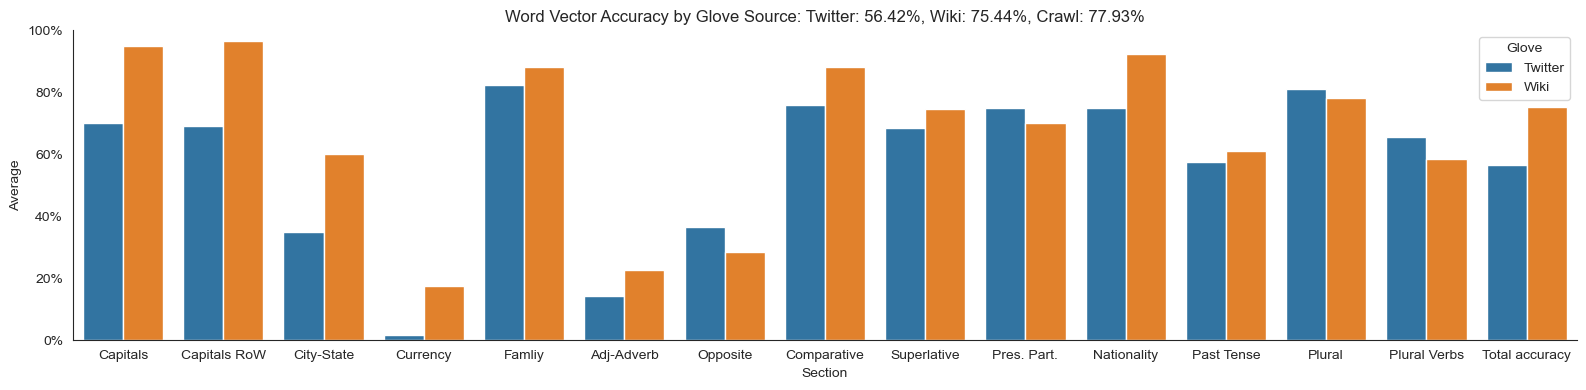

In [51]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.barplot(x='Section', y='Average', hue='Glove', data=accuracy, ax=ax)
ax.set_title(f'Word Vector Accuracy by Glove Source: Twitter: {0.564228:.2%}, Wiki: {0.75444:.2%}, Crawl: {0.779347:.2%}')
ax.set_ylim(0,1)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
sns.despine()
fig.tight_layout()
fig.savefig(results_path / 'glove_accuracy', dpi=300);

## Visualize Embeddings

### Load GloVe Wiki Vectors

In [52]:
model = KeyedVectors.load_word2vec_format(word2vec_wiki_file, binary=False)

In [53]:
def eval_analogies(file_name, vocab=100000):
    model = KeyedVectors.load_word2vec_format(file_name, binary=False)
    
    # Use evaluate_word_analogies instead of accuracy
    analogies_result = model.evaluate_word_analogies(analogies_path, restrict_vocab=vocab, case_insensitive=True)
    
    # Extract the relevant data for correct and incorrect results
    correct = sum([len(section['correct']) for section in analogies_result[1]])
    incorrect = sum([len(section['incorrect']) for section in analogies_result[1]])

    return pd.DataFrame([{
        'total_correct': correct,
        'total_incorrect': incorrect,
        'total_attempted': correct + incorrect,
        'accuracy': correct / (correct + incorrect) if (correct + incorrect) > 0 else 0
    }])


In [54]:
vectors = model.vectors[:100000]
vectors /= norm(vectors, axis=1).reshape(-1, 1)
vectors.shape

(100000, 300)

In [55]:
# Use index_to_key instead of index2word
words = model.index_to_key[:100000]  # Get the top 100000 words
word2id = {w: i for i, w in enumerate(words)}


### Project Embedding into 2D

In [56]:
pca = IncrementalPCA(n_components=2)

vectors2D = pca.fit_transform(vectors)
pd.Series(pca.explained_variance_ratio_).mul(100)

0    2.604632
1    1.293813
dtype: float64

### Plot Analogy Examples

In [82]:
print(accuracy)


           Section  Samples   Average    Glove
0         Capitals      462  0.701299  Twitter
1     Capitals RoW      930  0.690323  Twitter
2       City-State     3644  0.350714  Twitter
3         Currency      268  0.018657  Twitter
4           Famliy      342  0.824561  Twitter
5       Adj-Adverb      650  0.143077  Twitter
6         Opposite      342  0.365497  Twitter
7      Comparative     1260  0.757937  Twitter
8      Superlative      930  0.686022  Twitter
9      Pres. Part.      702  0.750712  Twitter
10     Nationality      870  0.750575  Twitter
11      Past Tense     1190  0.576471  Twitter
12          Plural     1122  0.811052  Twitter
13    Plural Verbs      600  0.655000  Twitter
14  Total accuracy    13312  0.564228  Twitter
15        Capitals      506  0.948617     Wiki
16    Capitals RoW     8372  0.964644     Wiki
17      City-State     4242  0.599953     Wiki
18        Currency      752  0.174202     Wiki
19          Famliy      506  0.881423     Wiki
20      Adj-A

In [83]:
print(accuracy.head())  # If it's a DataFrame
print(accuracy.columns)  # To see all available columns in the DataFrame


        Section  Samples   Average    Glove
0      Capitals      462  0.701299  Twitter
1  Capitals RoW      930  0.690323  Twitter
2    City-State     3644  0.350714  Twitter
3      Currency      268  0.018657  Twitter
4        Famliy      342  0.824561  Twitter
Index(['Section', 'Samples', 'Average', 'Glove'], dtype='object')


In [64]:
print(accuracy.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Section  30 non-null     object 
 1   Samples  30 non-null     int64  
 2   Average  30 non-null     float64
 3   Glove    30 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB
None


In [91]:
print(df.head())
print(df.columns)


       0
0  10360
0  38001
Index([0], dtype='object')


In [92]:
df = result.drop('section', axis=1).apply(lambda x: x.map(word2id))


In [93]:
print(df.head())  # Check that df has 4 columns (for the analogy words)
v = df.iloc[0, :].tolist()  # Get the indices of the 4 words
print(v)  # Should print a list of 4 word indices
most_similar_idx = find_most_similar_analogy(v)  # This should work correctly now


       0
0  10360
0  38001
[10360]


IndexError: list index out of range

In [88]:
from scipy.spatial.distance import cosine

def find_most_similar_analogy(v):
    """Find analogy that is most similar in 2D"""
    # Calculate the vector differences for the analogy
    v1 = vectors2D[v[1]] - vectors2D[v[0]]
    v2 = vectors2D[v[3]] - vectors2D[v[2]]
    
    # Calculate cosine similarity between v1 and v2
    similarity = cosine(v1, v2)
    
    return similarity


In [89]:
def get_plot_lims(coordinates):
    xlim, ylim = coordinates.agg(['min', 'max']).T.values
    xrange, yrange = (xlim[1] - xlim[0]) * .1, (ylim[1] - ylim[0]) * .1
    xlim[0], xlim[1] = xlim[0] - xrange, xlim[1] + xrange
    ylim[0], ylim[1] = ylim[0] - yrange, ylim[1] + yrange
    return xlim, ylim

In [90]:
most_similar_idx = find_most_similar_analogy(df)
print(f"Most similar index: {most_similar_idx}")


KeyError: 1

In [121]:
print(results.head())  # Inspect the first few rows of the results DataFrame


   correct_word  section
0      capitals  Twitter
1  capitals row  Twitter
2    city-state  Twitter
3      currency  Twitter
4        famliy  Twitter


In [122]:
print(len(words), vectors2D.shape)  # Ensure these contain valid data


100000 (100000, 2)


In [124]:
# Function to correct typos and handle multi-word phrases
def preprocess_words(word):
    # Fix common typos
    if word == 'famliy':
        return 'family'
    elif word == 'capitals row':
        return 'capitals'  # You can choose to return just "capitals"
    elif word == 'adj-adverb':
        return 'adjective'
    elif word == 'pres. part.':
        return 'present participle'
    elif word == 'past tense':
        return 'past'
    elif word == 'plural verbs':
        return 'plural'
    elif word == 'total accuracy':
        return None  # Exclude from mapping
    
    # For any other word, return it as is
    return word

# Apply preprocessing to the 'correct_word' column
results['correct_word'] = results['correct_word'].apply(preprocess_words)

# Remove any rows where the word was excluded (None)
results = results.dropna(subset=['correct_word'])

# Now map the words to IDs and drop NaNs
df = results.drop('section', axis=1).apply(lambda x: x.map(word2id)).dropna()

# Continue with the plotting process


In [126]:
df = result.drop('section', axis=1).apply(lambda x: x.map(word2id)).dropna()


KeyError: 1

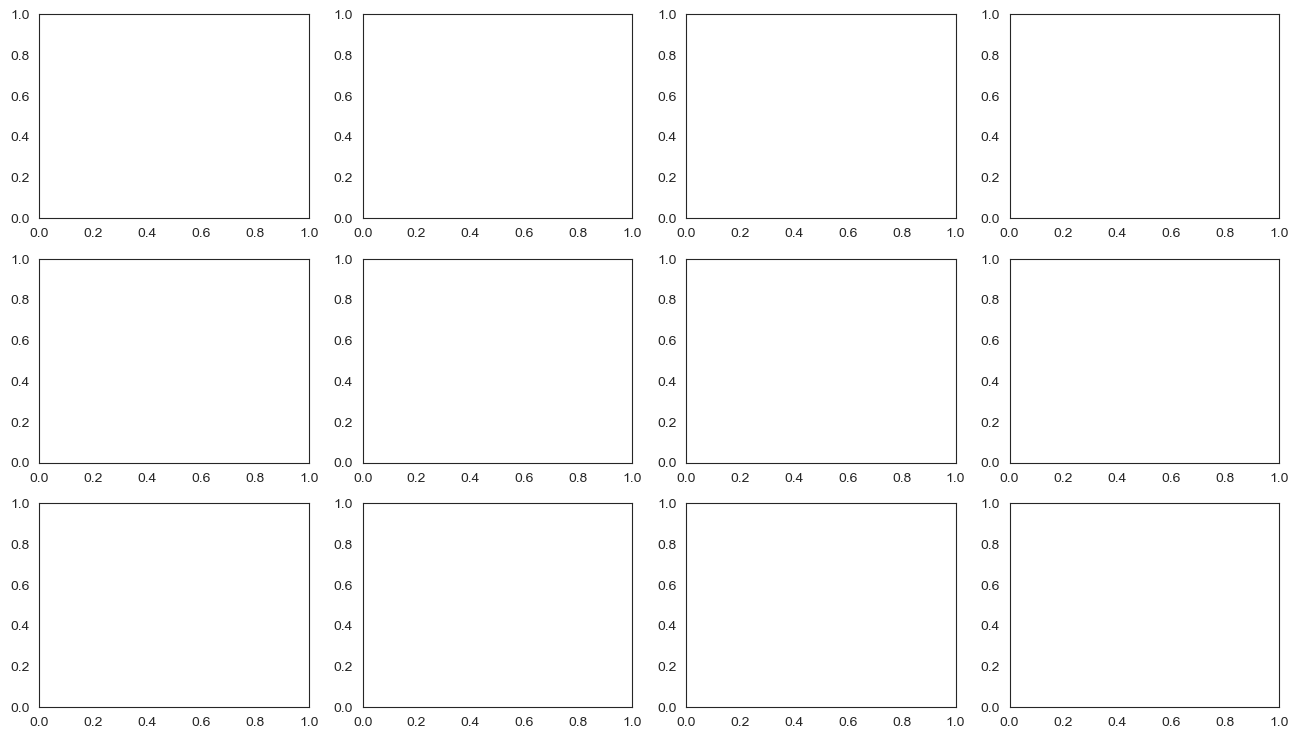

In [85]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'results' contains the word pairs and their relationships

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 9))
axes = axes.flatten()
fc = ec = 'darkgrey'

# Iterate through the grouped sections of results
for s, (section, result) in enumerate(results.groupby('section')):
    if s > 11:
        break  # Ensure we don't exceed 12 subplots

    # Convert words to their IDs using word2id
    df = result.drop('section', axis=1).apply(lambda x: x.map(word2id))

    # Find the most similar analogy index
    most_similar_idx = find_most_similar_analogy(df)
    
    # Extract the best analogy based on the most similar index
    best_analogy = result.iloc[most_similar_idx, :4].tolist()

    # Convert analogy words to their positions (index) in the vectors
    analogy_idx = [words.index(word) for word in best_analogy]
    best_analogy = [a.capitalize() for a in best_analogy]
    
    # Coordinates for the analogy words (xy positions from the 2D vectors)
    coords = pd.DataFrame(vectors2D[analogy_idx])  # Assumes 'vectors2D' holds 2D coordinates

    # Get the limits for the plot based on the coordinates
    xlim, ylim = get_plot_lims(coords)
    axes[s].set_xlim(xlim)
    axes[s].set_ylim(ylim)

    # Annotate the analogy on the plot
    for i in [0, 2]:  # Connect word pairs (e.g., a->b and c->d)
        axes[s].annotate(
            s=best_analogy[i], xy=coords.iloc[i+1], xytext=coords.iloc[i],
            arrowprops=dict(width=1, headwidth=5, headlength=5, fc=fc, ec=ec, shrink=.1),
            fontsize=12
        )
        axes[s].annotate(
            best_analogy[i+1], xy=coords.iloc[i+1],
            xytext=coords.iloc[i+1], va='center', ha='center',
            fontsize=12, color='darkred' if i == 2 else 'k'  # Color for emphasis
        )

    # Turn off axis lines for a cleaner look
    axes[s].axis('off')

    # Set a title for the plot based on the section
    title = ' '.join([s.capitalize() for s in section.split('-') if not s.startswith('gram')])
    axes[s].set_title(title, fontsize=16)

# Set the overall title for the figure and adjust layout
fig.suptitle('Word2Vec Embeddings | Analogy Examples', fontsize=18)
fig.tight_layout()
fig.subplots_adjust(top=.9)

plt.show()
